In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [2]:
#reading in insurance file
insurance = pd.read_csv("insurance.csv")
insurance

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


# Determining Data Types

In [3]:
insurance.dtypes

index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Summary Statistics of Charges

In [4]:
insurance["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

# Determining Relationships between Charges and Other Variables

## BMI

Text(0.5, 1.0, 'Individuals Insurance Charges vs. BMI')

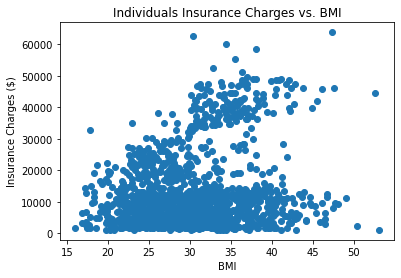

In [5]:
#plotting insurance charges vs. body mass index
plt.scatter(insurance["bmi"], insurance["charges"])
plt.xlabel("BMI")
plt.ylabel("Insurance Charges ($)")
plt.title("Individuals Insurance Charges vs. BMI")

## Age

Text(0.5, 1.0, 'Individuals Insurance Charges vs. Age')

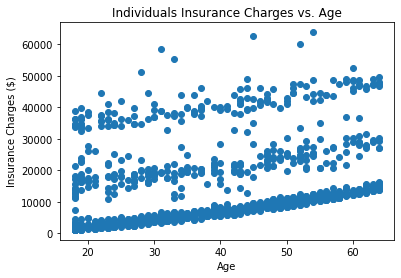

In [6]:
#plotting insurance charges vs. age
plt.scatter(insurance["age"], insurance["charges"])
plt.xlabel("Age")
plt.ylabel("Insurance Charges ($)")
plt.title("Individuals Insurance Charges vs. Age")

## Children

Text(0.5, 1.0, 'Individuals Insurance Charges vs. Number of Children')

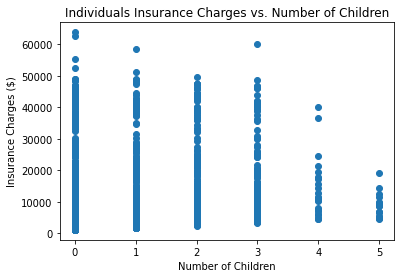

In [7]:
#plotting insurance charges vs. number of children
plt.scatter(insurance["children"], insurance["charges"])
plt.xlabel("Number of Children")
plt.ylabel("Insurance Charges ($)")
plt.title("Individuals Insurance Charges vs. Number of Children")

## Region

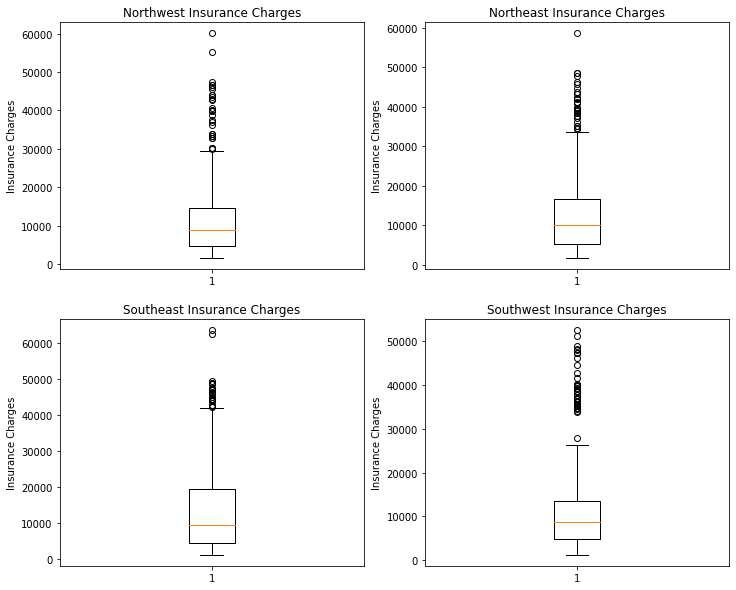

In [8]:
#creating dataframes for each of the four regions
northwest = insurance[insurance['region'] == "northwest"]
northeast = insurance[insurance['region'] == "northeast"]
southeast = insurance[insurance['region'] == "southeast"]
southwest = insurance[insurance['region'] == "southwest"]

#plotting boxplots for insurance charges vs. region
plt.figure(figsize=(12,10))

#boxplot for northwest
plt.subplot(2,2,1)
plt.boxplot(northwest['charges'])
plt.ylabel("Insurance Charges")
plt.title("Northwest Insurance Charges")

#boxplot for northeast
plt.subplot(2,2,2)
plt.boxplot(northeast['charges'])
plt.ylabel("Insurance Charges")
plt.title("Northeast Insurance Charges")

#boxplot for southest
plt.subplot(2,2,3)
plt.boxplot(southeast['charges'])
plt.ylabel("Insurance Charges")
plt.title("Southeast Insurance Charges")

#boxplot for southwest
plt.subplot(2,2,4)
plt.boxplot(southwest['charges'])
plt.ylabel("Insurance Charges")
plt.title("Southwest Insurance Charges");

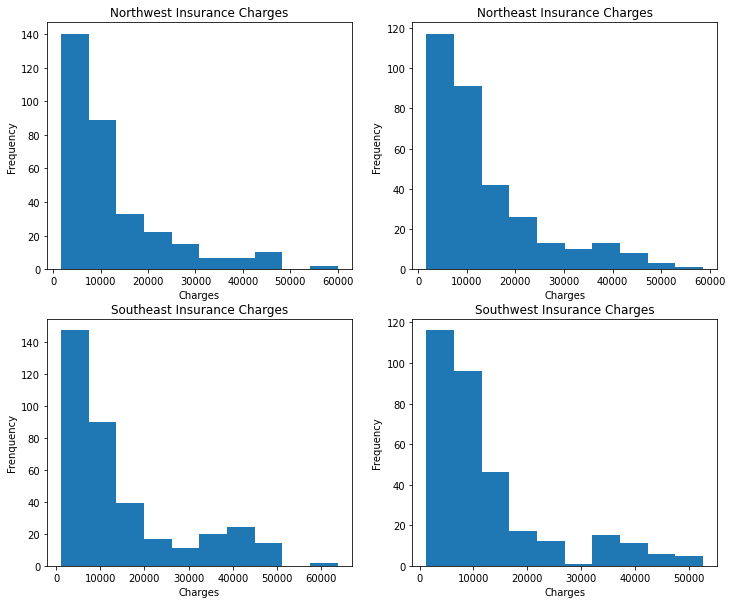

In [9]:
#plotting histograms for insurance charges vs. four different regions
plt.figure(figsize=(12,10))

#histogram for northwest
plt.subplot(2,2,1)
plt.hist(northwest['charges'])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Northwest Insurance Charges")

#histogram for northeast
plt.subplot(2,2,2)
plt.hist(northeast['charges'])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Northeast Insurance Charges")

#histogram for southeast
plt.subplot(2,2,3)
plt.hist(southeast['charges'])
plt.xlabel("Charges")
plt.ylabel("Frenquency")
plt.title("Southeast Insurance Charges")

#histogram for southwest
plt.subplot(2,2,4)
plt.hist(southwest['charges'])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Southwest Insurance Charges");

## Smoker or Non-Smoker

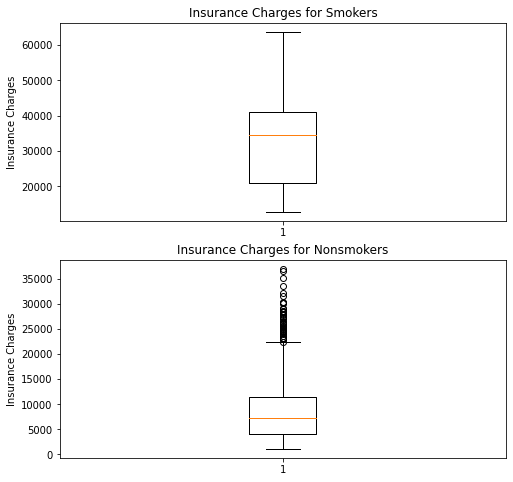

In [10]:
#creating new dataframes for smokers and nonsmokers
smoker = insurance[insurance['smoker'] == 'yes']
nonsmoker = insurance[insurance['smoker'] == 'no']

#plotting boxplots for insurance charges vs. smokers and nonsmokers
plt.figure(figsize = (8,8))

#boxplot for smokers
plt.subplot(2,1,1)
plt.boxplot(smoker['charges'])
plt.ylabel("Insurance Charges")
plt.title("Insurance Charges for Smokers")

#boxplot for nonsmokers
plt.subplot(2,1,2)
plt.boxplot(nonsmoker['charges'])
plt.ylabel("Insurance Charges")
plt.title("Insurance Charges for Nonsmokers");

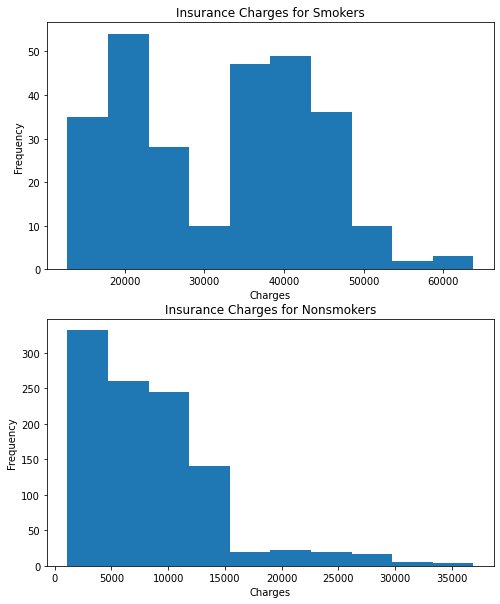

In [11]:
#plotting a histogram for insurance charges for smokers and nonsmokers
plt.figure(figsize = (8,10))

#histogram for smokers
plt.subplot(2,1,1)
plt.hist(smoker['charges'])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Insurance Charges for Smokers")

#histogram for nonsmokers
plt.subplot(2,1,2)
plt.hist(nonsmoker['charges'])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Insurance Charges for Nonsmokers");

## Gender

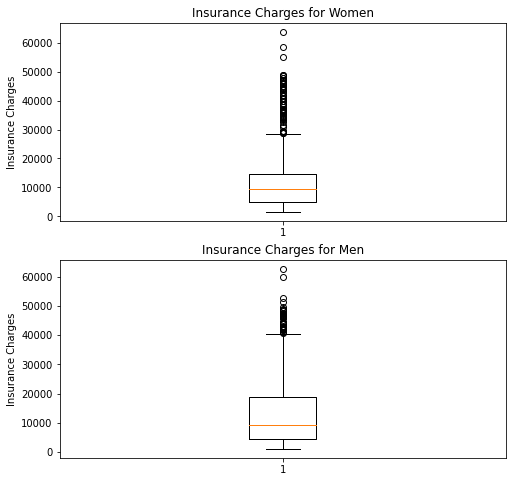

In [12]:
#creating new dataframes for only women and only men
female = insurance[insurance['sex'] == 'female']
male = insurance[insurance['sex'] == 'male']

#plotting boxplots for insurance charges of women and men
plt.figure(figsize=(8,8))

#boxplot for women
plt.subplot(2,1,1)
plt.boxplot(female['charges'])
plt.ylabel('Insurance Charges')
plt.title("Insurance Charges for Women")

#boxplot for men
plt.subplot(2,1,2)
plt.boxplot(male['charges'])
plt.ylabel("Insurance Charges")
plt.title("Insurance Charges for Men");

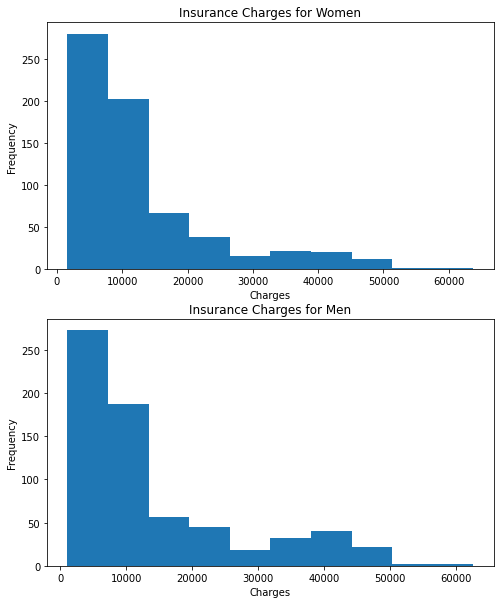

In [13]:
#plotting histogram of insurance charges for women and men
plt.figure(figsize=(8,10))

#histogram for men
plt.subplot(2,1,1)
plt.hist(female['charges'])
plt.xlabel("Charges")
plt.ylabel('Frequency')
plt.title("Insurance Charges for Women")

#histogram of men
plt.subplot(2,1,2)
plt.hist(male['charges'])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Insurance Charges for Men");

## Predicted Important Factors

Age, Smoker or Non-Smoker, BMI

Text(0.5, 1.0, 'Individuals Insurance Charges vs. Age')

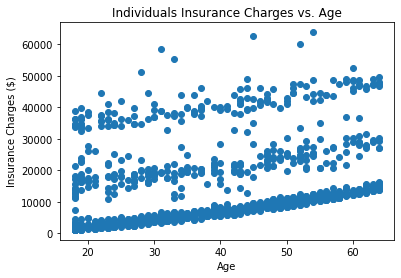

In [14]:
#plotting insurance charges vs. age
plt.scatter(insurance["age"], insurance["charges"])
plt.xlabel("Age")
plt.ylabel("Insurance Charges ($)")
plt.title("Individuals Insurance Charges vs. Age")

Text(0.5, 1.0, 'Individuals Insurance Charges vs. BMI')

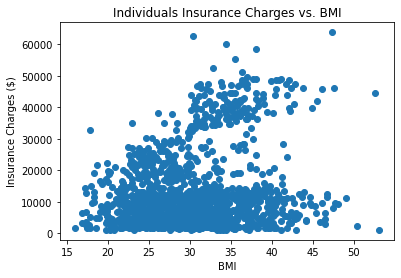

In [15]:
#plotting insurance charges vs. body mass index
plt.scatter(insurance["bmi"], insurance["charges"])
plt.xlabel("BMI")
plt.ylabel("Insurance Charges ($)")
plt.title("Individuals Insurance Charges vs. BMI")

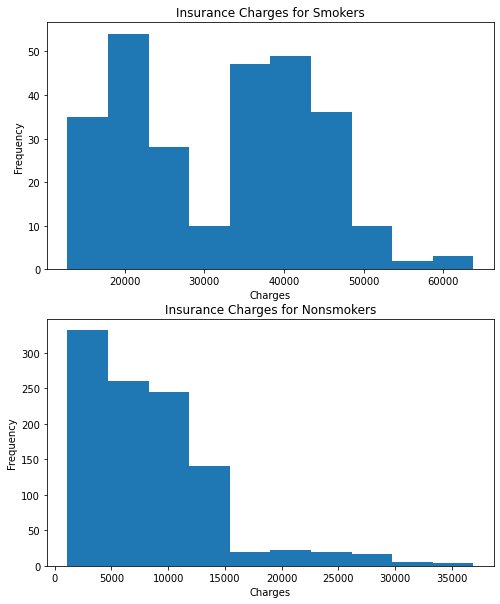

In [16]:
#plotting insurance charges for smokers and nonsmokers
plt.figure(figsize = (8,10))

#plot for smokers
plt.subplot(2,1,1)
plt.hist(smoker['charges'])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Insurance Charges for Smokers")

#plot for nonsmokers
plt.subplot(2,1,2)
plt.hist(nonsmoker['charges'])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Insurance Charges for Nonsmokers");

# Individual Person Class

In [25]:
class InsuranceHolder():
    """
        This is an Insurace Holder class, used to store information about each insurance holder and can
        calculate insurance charges for the holder based on the stored information.
    """
    
    def __init__(self, age=0, sex="male", bmi=0, children=0, smoker="no", region="northeast"):
        """ Intialize the InsuranceHolder object.
        Inputs are
        age: age of the insurance holder (int)
        sex: the gender of the insurance holder ("male" or "female")
        bmi: body mass index of the insurance holder (int)
        children: the number of children the insurance holder has (int)
        smoker: whether the insurance holder smokes ("yes" or "no")
        region: region the insurance holder lives in ("northeast", "northwest", "southeast", or "southwest")
        """
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
        self.region = region
        
    def set_age(self, age):
        """ Set insurance holder's age. """
        self.age = age
        
    def set_sex(self, sex):
        """ Set insurance holder's sex. """
        self.sex = sex
        
    def set_bmi(self, bmi):
        """ Set insurance holder's bmi. """
        self.bmi = bmi
        
    def set_children(self, children):
        """ Set insurance holder's number of children. """
        self.children = children
        
    def set_smoker(self, smoker):
        """ Set whether the insurance holder smokes. """
        self.smoker = smoker
        
    def set_region(self, region):
        """ Set insurance holder's region. """
        self.region = region
        
    def get_age(self):
        """ Return insurance holder's age. """
        return self.age
    
    def get_sex(self):
        """ Return insurance holder's sex. """
        return self.sex
    
    def get_bmi(self):
        """ Return insurance holder's bmi. """
        return self.bmi
    
    def get_children(self):
        """ Return insurance holder's number of children. """
        return self.children
    
    def get_smoker(self):
        """ Return whether the insurance holder smokes. """
        return self.smoker
    
    def get_region(self):
        """ Return insurance holder's region. """
        return self.region
    
    def calculate_charges(self):
        """ Returns insurance holder's calculated charges. """
        #calculating insurance charges using determined best model
        charges = -12630
        charges += 256.6675*self.age
        charges += 338.9018*self.bmi
        charges += 521.9897*self.children
        if (self.smoker == "yes"):
            charges += 24170
        return charges
    

# Model

### Changing Variables to Numeric Values

##### Sex
male = 0
female = 1

##### Smoker

no = 0
yes = 1

In [18]:
#replacing sex and smoker string value with 0 and 1
insurance_mod = insurance.replace({"sex": {"male":0, "female":1}})
insurance_mod = insurance_mod.replace({"smoker": {"no":0, "yes":1}})

In [19]:
#dropping region and index columns
insurance_mod = insurance_mod.drop(columns = ["index", "region"])


In [20]:
insurance_mod.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
charges     float64
dtype: object

## Splitting Data into Training and Testing

In [21]:
#dataframe of charges
insurance_charges = insurance_mod["charges"]

#dataframe of other variables without charges
insurance_var = insurance_mod[["age", "sex", "bmi", "children", "smoker"]].copy()

train_vectors, test_vectors, train_labels, test_labels = train_test_split(insurance_var, insurance_charges, test_size = 0.25, train_size = 0.75)

### First Model

In [22]:
#creating first model with all variables included
model = sm.OLS(train_labels, sm.add_constant(train_vectors))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     606.3
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          2.60e-299
Time:                        16:49:10   Log-Likelihood:                -10176.
No. Observations:                1003   AIC:                         2.036e+04
Df Residuals:                     997   BIC:                         2.039e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.265e+04   1145.224    -11.047      0.0

### First Model Analysis

Of the variables that included in the model (age, sex, bmi, children, smoker), only one variable has a p-val above the cutoff of 0.05. That variable is sex with a p-value of 0.919. Sex is not significant to this model.

### Second Model (w/o Sex)

In [23]:
#dropping sex column from training and testing data
train_vectors2 = train_vectors.drop(columns = ["sex"])
train_labels2 = train_labels.drop(columns = ["sex"])
test_vectors2 = test_vectors.drop(columns = ["sex"])
test_labels2 = test_labels.drop(columns = ["sex"])

In [24]:
#creating second model without the sex variable
model2 = sm.OLS(train_labels2, sm.add_constant(train_vectors2))
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     758.7
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          8.92e-301
Time:                        16:49:28   Log-Likelihood:                -10176.
No. Observations:                1003   AIC:                         2.036e+04
Df Residuals:                     998   BIC:                         2.039e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.263e+04   1123.348    -11.242      0.0

## Best Model

$$charges = -12630 + 256.6675*age + 338.9018*bmi + 521.9897*children + 24170*smoker $$

### Second Model Analysis

All of the variables remaining are significant to the model. All the variables have a p-value that is less than 0.05. The r-squared value and the adjusted r-squared value either didn't change or barely changed in this model.

## Testing the Model

In [26]:
#predicting the test charges with the model
prediction_vals = results2.predict(sm.add_constant(test_vectors2))

#determining the amount of predicted and actual values have a difference less than 5000
test = (round(prediction_vals, 2) - round(test_labels2, 2)) <= 5000
np.mean(test)

0.8686567164179104

With a difference of less than 5000 between predicted and actual charges, it is 86.87% accurate.

In [27]:
#determining the amount of predicted and actual values have a difference less than 10000
test2 = (round(prediction_vals, 2) - round(test_labels2, 2)) <= 10000
np.mean(test2)

0.9492537313432836

With a difference of less than 10000 between the predicted and actual charges, it is 94.93% accurate.

In [28]:
#determining the amount of predicted and actual values have a difference less than 1000
test3 = (round(prediction_vals, 2) - round(test_labels2, 2)) <= 1000
np.mean(test3)

0.5014925373134328

With a difference of less than 1000 between the predicted and actual charges, it is 50.15% accurate.

In [29]:
round(np.std(insurance["charges"]), 2)

12105.48

# Predicting Charges with Class and Best Model

In [30]:
#initializing different insurance holders with different attributes
holder1 = InsuranceHolder(age = 43, bmi = 20, children = 2, region = "southwest")
holder2 = InsuranceHolder(age = 22, bmi = 30, children = 0, smoker = "yes", region = "northwest")
holder3 = InsuranceHolder(age = 67, bmi = 25, children = 3, smoker = "yes", region = "southest")
holder4 = InsuranceHolder(age = 32, sex = "female", bmi = 18, children = 1, region = "northeast")
holder5 = InsuranceHolder(age = 19, sex = "female", bmi = 23, smoker = "yes", region = "southwest")
holder6 = InsuranceHolder(age = 54, sex = "female", bmi = 27, children = 4, region = "northwest")

In [31]:
#calculating charges for each of the insurance holders
print("Holder 1:\n", "Age:", holder1.get_age(), "Sex:", holder1.get_sex(), "BMI:", holder1.get_bmi(), 
      "Children:", holder1.get_children(), "Smoker?", holder1.get_smoker(), "Region:", holder1.get_region(), 
      "Charges:", holder1.calculate_charges())

print("Holder 2:\n", "Age:", holder2.get_age(), "Sex:", holder2.get_sex(), "BMI:", holder2.get_bmi(), 
      "Children:", holder2.get_children(), "Smoker?", holder2.get_smoker(), "Region:", holder2.get_region(), 
      "Charges:", holder2.calculate_charges())

print("Holder 3:\n", "Age:", holder3.get_age(), "Sex:", holder3.get_sex(), "BMI:", holder3.get_bmi(), 
      "Children:", holder3.get_children(), "Smoker?", holder3.get_smoker(), "Region:", holder3.get_region(), 
      "Charges:", holder3.calculate_charges())

print("Holder 4:\n", "Age:", holder4.get_age(), "Sex:", holder4.get_sex(), "BMI:", holder4.get_bmi(), 
      "Children:", holder4.get_children(), "Smoker?", holder4.get_smoker(), "Region:", holder4.get_region(), 
      "Charges:", holder4.calculate_charges())

print("Holder 5:\n", "Age:", holder5.get_age(), "Sex:", holder5.get_sex(), "BMI:", holder5.get_bmi(), 
      "Children:", holder5.get_children(), "Smoker?", holder5.get_smoker(), "Region:", holder5.get_region(), 
      "Charges:", holder5.calculate_charges())

print("Holder 6:\n", "Age:", holder6.get_age(), "Sex:", holder6.get_sex(), "BMI:", holder6.get_bmi(), 
      "Children:", holder6.get_children(), "Smoker?", holder6.get_smoker(), "Region:", holder6.get_region(), 
      "Charges:", holder6.calculate_charges())

Holder 1:
 Age: 43 Sex: male BMI: 20 Children: 2 Smoker? no Region: southwest Charges: 6228.7179000000015
Holder 2:
 Age: 22 Sex: male BMI: 30 Children: 0 Smoker? yes Region: northwest Charges: 27353.739
Holder 3:
 Age: 67 Sex: male BMI: 25 Children: 3 Smoker? yes Region: southest Charges: 38775.236600000004
Holder 4:
 Age: 32 Sex: female BMI: 18 Children: 1 Smoker? no Region: northeast Charges: 2205.5821000000005
Holder 5:
 Age: 19 Sex: female BMI: 23 Children: 0 Smoker? yes Region: southwest Charges: 24211.4239
Holder 6:
 Age: 54 Sex: female BMI: 27 Children: 4 Smoker? no Region: northwest Charges: 12468.352400000002
